# Example qqplot

If you have a series of independent samples, and sort them in order, if you plot them against their p-value you should get a diagonal.

$$V_i \sim \mathbb{U}(0,1) $$

Order by magnitude $V_{(i)}$, the values become dependent because $\mathbb{P}(V_{(1)} < V_{(2)})=1$.

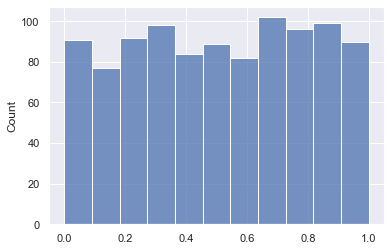

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
sns.set(style="darkgrid")


n = 1000

v = np.random.uniform(size=n)

sns.histplot(v);

v_sort = np.sort(v)

positions = [i/(n+1) for i in range(0,n)]

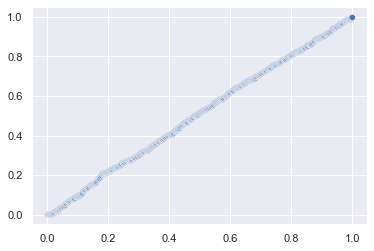

In [38]:
sns.scatterplot(x=positions,y=v_sort);

$$X_i \sim \mathbb{N}(0,1) $$
Order by magnitude $X_{(i)}$ will give you 
$$\Phi \left(\frac{X_{(i)}-\mu}{\sigma}\right) \approx \frac{i}{n+1} $$

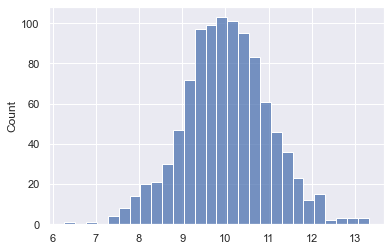

In [103]:
from scipy.stats import norm

x=np.random.normal(10,1,n)

sns.histplot(x);

x_sort = np.sort(x)

probs = norm.cdf(x_sort, loc=10,scale=1)


positions = [i/(n+1) for i in range(1,n+1)]


y = norm.ppf(positions)


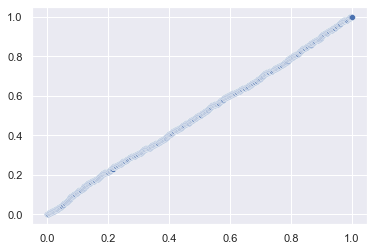

In [104]:
sns.scatterplot(x=positions,y=probs);

In [134]:
def lin_fit_ls(x,y):
    A = np.vstack([x, np.ones(len(x))]).T
    return np.linalg.lstsq(A, y, rcond=None)[0]


beta_hat, alpha_hat = lin_fit_ls(y,x_sort)


print(f'\u03BC_hat = {alpha_hat}','max likelihood estimate' ,np.mean(x))
print(f'\u03C3_hat = {beta_hat}','max likelihood estimate', np.std(x))

μ_hat = 10.013295424685456 max likelihood estimate 10.01329542468546
σ_hat = 1.0006676226969966 max likelihood estimate 0.996050819000778


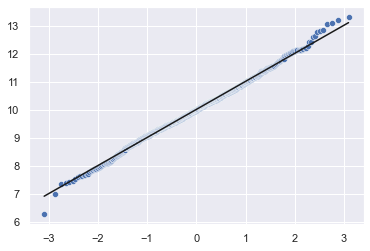

In [112]:
f,ax=plt.subplots()
sns.scatterplot(x=y,y=x_sort,ax=ax)
ax.plot(y, alpha_hat+beta_hat*y,'-',color='k');

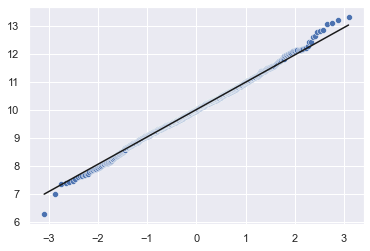

In [120]:
from sklearn.linear_model import TheilSenRegressor

reg =  TheilSenRegressor(random_state=42)

reg.fit(np.vstack([y, np.ones(len(y))]).T,x_sort)

y_hat = reg.predict(np.vstack([y, np.ones(len(y))]).T)

f,ax=plt.subplots()
sns.scatterplot(x=y,y=x_sort,ax=ax)
ax.plot(y,y_hat ,'-',color='k');
